# Lecture 7, Data science in Neuroscience


## Overview of 3 short data analysis projects

We will have a meeting early in January during which you will present your project. Your presentation should last between 5 and 10 minutes. You can present using a Jupyter notebook or a traditional slide show with code and results (figures or videos).

Each participant or team will need to submit its notebook to Kevin at allen"@"uni-heidelberg.de (without the quotes).

You can work in teams of 2 if you want. 

You can pick one of the project listed below.

If you would like to work on a different project, inform Kevin in advance to make sure the project is suitable.

***
### Project 1, Modelling the tuning curve of a head-direction cell

In Lecture 4, we learned how to use a training loop to find the line (slope and intercept) that best described the firing of a speed cell. 

In Project 1, you can use a similar technique to describe the firing rate of a head-direction cell. A head-direction cell fire action potentials when the head of an animal points in a specific direction (e.g., North). The head-direction data are in radians and range from -pi to pi. 

The simulated data is in `../data/hd_cell.npy`. The first column is the heading and the second the firing rate.

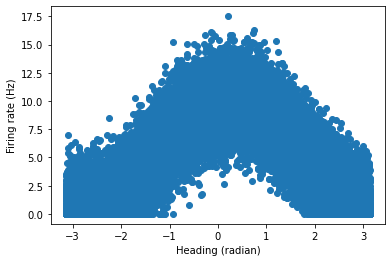

In [3]:
import numpy as np
import matplotlib.pyplot as plt

fn="../data/hd_cell.npy"
hd_cell = np.load(fn)

heading = hd_cell[:,0]
rate = hd_cell[:,1]

plt.scatter(hd_cell[:,0],hd_cell[:,1])
plt.ylabel("Firing rate (Hz)")
plt.xlabel("Heading (radian)")
plt.show()

You will work with a model that uses head-direction to predict the firing rate of the neuron.

The formula to model this neuron is

$\hat{y} = w_{0} * (cos(x - w_{1})+1)/2$, where

* $\hat{y}$ is the prediction of the model
* $w$ is a vector with 2 parameters that we need to estimate
* $w_0$ is the gain
* $w_1$ is the preferred heading of the neuron
* $x$ is the animal heading

Your task is to find the parameters $W$ that best fit the data. In other words, what values of gain $w_0$ and preferred direction $w_1$ lead to the best match between the firing rate prediction and the observed firing rate. 

For training your model, you can use MSE as a loss function.

To find the best parameters, you could use either the `scipy.optimize.minimize()` function or use `PyTorch`. There is an example of how you could use these to find the best parameters at the end of the `lecture_04.ipynb` file.

Once you have the best parameters, create a single plot containing the observed data (like above) and the predictions of your trained model.

***
### Project 2, Deeplabcut

In Project 2, you will use deeplabcut to track the position of one or several objects (or body parts) in a video. You can use data from your own videos (more fun) or use one of the videos in the `deeplabcut/project_videos` directory of the course repository. 

You should train your network using approximagely 100-300 frames. This should be enough to get you relatively good tracking.

If you are tracking a mouse, you could track 4 body parts:

* nose (snout)
* earL
* earR
* tail

The list of body parts and the number of frames to pick are set in the `config.yaml` file of your project.

You can use Google Colab to train your network on Google's GPUs.

Once your network is trained, you should evaluate you network on the train and test datasets and report the error for both datasets during your presentation.

You can also label your video (put markers on the tracked objects) and show us the label video during your presentation. 

For your presentation, briefly describe how you performed these steps (project creation, labelling frames, training network, network evaluation (what was the error on training and test sets). Show us your labelled video to get an idea of how good or bad your network is working. 

Is the tracking good for all types of behavior or are there conditions in which the tracking should be improved?

***
### Project 3, Head-direction cell

In lecture 6, we generated the firing rate map of a grid cell. In project 3, your task is to apply similar techniques to calculate the tuning curve of a head-direction cell. The tuning curve is the firing rate of the neuron as a function of the head direction of the animal. 

You can find the raw data in the file `../data/headDirectionCellData.pickle`. The structure of the data is similar to that of the grid cell data.

The position data that we used in Lecture 6 were 2-dimensional (x and y). In this project, the head-direction data are in 1D. 

The head-direction data are in radians and range from -pi to pi. This head-direction data are circular data, meaning that -pi is also pi. You will need to deal with this when calculating the head-direction associated with each spike using interpolation. The trick is to calculate the cos(x) and sin(x) for each head-direction value, perform the interpolation using these values, and then tranforming them back to head-direction. 

You will need to perform the following steps

1. Create a 1D occupancy histogram containing the time in seconds as a function of head direction.
2. Find the head-direction of the animal associated with each spike. You will need to decompose HD into cos(HD) and sin(HD), do the interpolation, and transform the data back into head-direction.
3. Create a 1D spike count histogram containing the number of spikes as a function of head direction.
4. Calculate the firing rate as a function of head direction.
5. Try to apply smoothing to your firing rate histogram. You can use the `scipy.ndimage.gaussian_filter1d()` function. Pay attention to the `mode` parameter of the gaussian_filter1d() function. What is the best `mode` given that you are using circular data (head-direction)?